In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #正常显示负号

In [2]:
df = pd.read_csv('Temp.csv')
df.head(10)

,职位,公司,工作地点,福利,学历,经验年数,招聘人数,最低工资,最高工资,福利值
0,ERP实施,金蝶软件合肥分公司,合肥,"绩效奖金,定期体检,员工旅游,年终奖金,弹性工作,专业培训",本科,0.0,5,0.40,0.60,176
1,数据仓库工程师,土巴兔装修网,深圳,"五险一金,员工旅游,交通补贴,绩效奖金,股票期权,弹性工作,定期体检,专业培训",无学历要求,0.0,1,1.50,3.00,268
2,软件测试工程师,证通股份有限公司,上海,"做五休二,补充公积金,补充医疗保险,节日福利,免费班车,餐饮补贴",本科,0.0,2,1.50,3.00,166
3,C#.NET开发工程师,武汉微诚科技股份有限公司西安研发中心,西安,"保险,交通补贴,餐饮补贴,绩效奖金,年终奖金,专业培训",本科,6.0,5,0.60,1.50,191
4,C++研发工程师,北京凯罗斯软件科技有限公司,北京,无,本科,0.0,2,1.00,1.50,0
5,PHP开发工程师,上海菜花文化传媒有限公司,上海,无,大专,6.0,1,2.00,2.50,0
6,产品运营,健客网,东莞,"五险一金,员工旅游,绩效奖金,提供住宿,房屋补贴",本科,1.0,2,0.30,0.50,205
7,C#.NET开发工程师,昆明新奇星科技有限公司,昆明,"五险一金,员工旅游,年终奖金,定期体检,专业培训,餐饮补贴",大专,1.0,3,0.35,0.45,221
8,软件测试工程师,睿思商业智能（深圳）有限公司,深圳,"做五休二,周末双休,带薪年假,五险一金,免费班车,节日福利,交通补贴,餐饮补贴,加班补贴,通讯补贴",大专,0.0,6,0.50,0.80,360
9,区块链工程师,广州畅游互动信息技术有限公司,广州,"带薪年假,节日福利,专业培训",本科,0.0,1,2.50,3.50,83


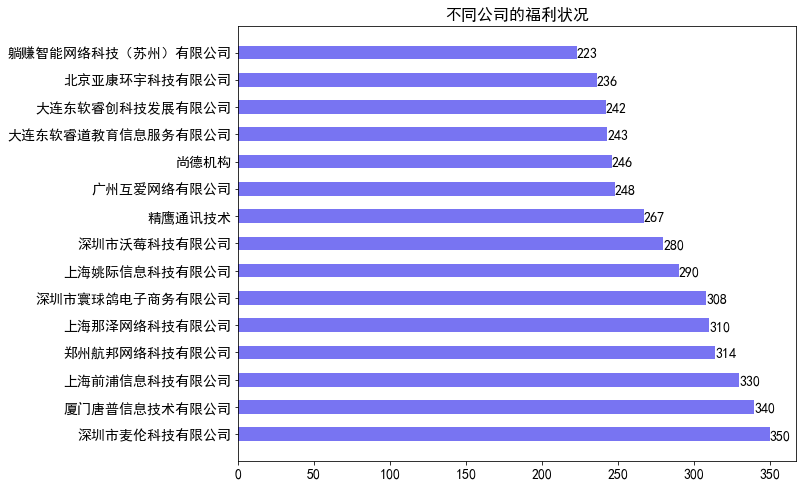

In [3]:
#不同公司的福利状况
N = 15
s = df.groupby('公司')['公司'].count()
s.sort_values(ascending=False,inplace=True)
df1 = df[df['公司'].isin(s.head(30).index)]
comp_wel = df1.groupby(by='公司')['福利值'].median().sort_values(ascending = False).head(N)

plt.figure(figsize=(10,8))
y = np.arange(N)
plt.barh(y,comp_wel,0.5,color='#7874f2')
plt.yticks(np.arange(N),comp_wel.index,fontsize=14)
plt.tick_params(labelsize=14)
plt.title('不同公司的福利状况',fontsize=16)
for a,b in zip(comp_wel.head(N),y):
    plt.text(a+0.1,b-0.2,a,fontsize=14)
plt.show()

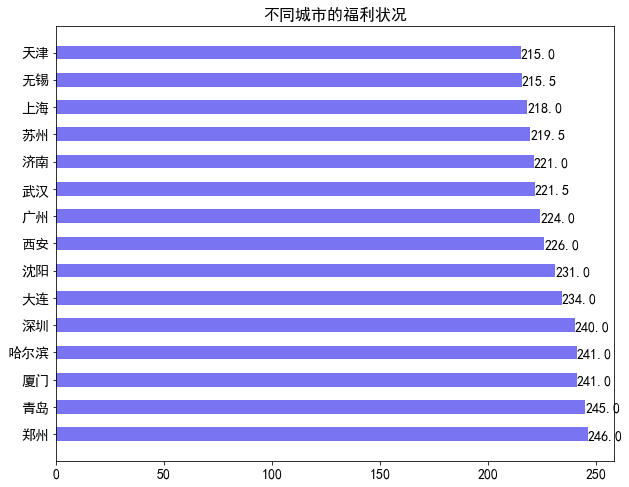

In [4]:
# s=df.groupby('工作地点')['工作地点'].count()
# s.sort_values(ascending=False,inplace=True)
# sf = df[df['工作地点'].isin(s.head(30).index)]
#不同城市的福利状况
N = 15
s = df.groupby('工作地点')['工作地点'].count()
s.sort_values(ascending=False,inplace=True)
df1 = df[df['工作地点'].isin(s.head(30).index)]
df1=df1[~df1['工作地点'].isin(['异地招聘'])]
city_wel = df1.groupby(by='工作地点')['福利值'].median().sort_values(ascending = False).head(N)

plt.figure(figsize=(10,8))
y = np.arange(N)
plt.barh(y,city_wel,0.5,color='#7874f2')
plt.yticks(np.arange(N),city_wel.index,fontsize=14)
plt.tick_params(labelsize=14)
plt.title('不同城市的福利状况',fontsize=16)
for a,b in zip(city_wel.head(N),y):
    plt.text(a+0.1,b-0.2,a,fontsize=14)
plt.show()

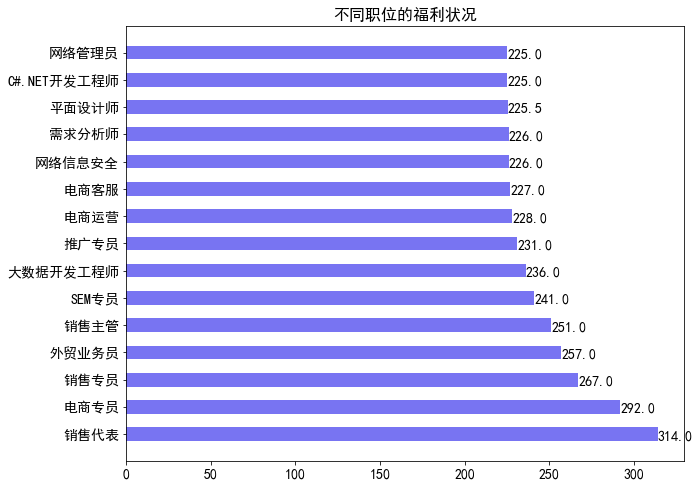

In [5]:
#不同职位的福利状况
N = 15
s = df.groupby('职位')['职位'].count()
s.sort_values(ascending=False,inplace=True)
df1 = df[df['职位'].isin(s.head(50).index)]
job_wel = df1.groupby(by='职位')['福利值'].median().sort_values(ascending = False).head(N)

plt.figure(figsize=(10,8))
y = np.arange(N)
plt.barh(y,job_wel,0.5,color='#7874f2')
plt.yticks(np.arange(N),job_wel.index,fontsize=14)
plt.tick_params(labelsize=14)
plt.title('不同职位的福利状况',fontsize=16)
for a,b in zip(job_wel.head(N),y):
    plt.text(a+0.1,b-0.2,a,fontsize=14)
plt.show()

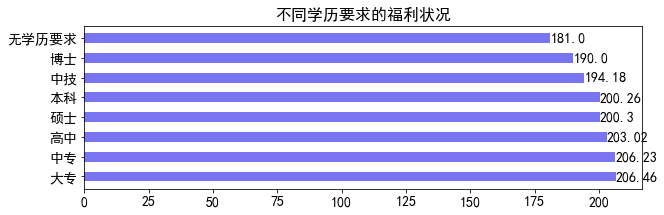

In [6]:
#不同学历的福利状况
s = df.groupby('学历')['学历'].count()
s.sort_values(ascending=False,inplace=True)
df1 = df[df['学历'].isin(s.head(50).index)]
deg_wel = df1.groupby(by='学历')['福利值'].mean().apply(lambda x:round(x,2)).sort_values(ascending = False)
N = len(deg_wel)

plt.figure(figsize=(10,3))
y = np.arange(N)
plt.barh(y,deg_wel,0.5,color='#7874f2')
plt.yticks(np.arange(N),deg_wel.index,fontsize=14)
plt.tick_params(labelsize=14)
plt.title('不同学历要求的福利状况',fontsize=16)
for a,b in zip(deg_wel.head(N),y):
    plt.text(a+0.1,b-0.2,a,fontsize=14)
plt.show()

In [7]:
##定义自动标注的函数
def autolabel(rects, ypos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *ypos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'top', 'bottom'}.
    """

    ypos = ypos.lower()  # normalize the case of the parameter
    va = {'center': 'center', 'bottom': 'top', 'top': 'bottom'}
    offset = {'center': 0.5, 'top': 0.57, 'bottom': 0.43}  # x_txt = x + w*off

    for rect in rects:
        width = rect.get_width()
        ax.text(1.01*width,rect.get_y() + rect.get_height()*offset[ypos],
                '{}'.format(width), va=va[ypos], ha='left',fontsize=12)

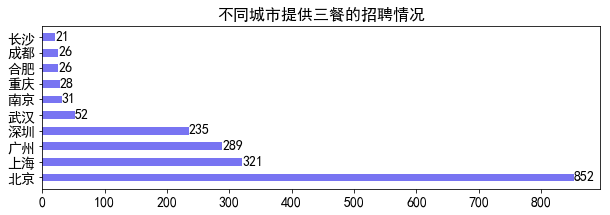

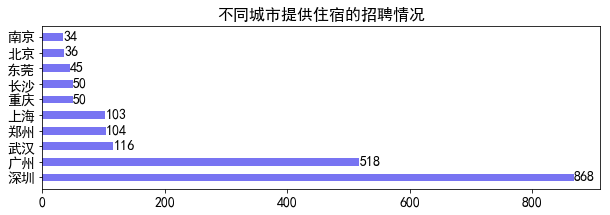

In [8]:
N = 10
s = df.groupby('工作地点')['工作地点'].count()
s.sort_values(ascending=False,inplace=True)
df1 = df[df['工作地点'].isin(s.head(100).index)]
df1=df1[~df1['工作地点'].isin(['异地招聘'])]
df1_eat = df1[df1['福利'].str.contains('包吃') | df1['福利'].str.contains("包食") | df1['福利'].str.contains("免费三餐") |\
            df1['福利'].str.contains("包三餐")]['工作地点'].value_counts().head(N)
df1_eat
df1_sleep = df1[df1['福利'].str.contains('包住') | df1['福利'].str.contains('宿')]['工作地点'].value_counts().head(N)

plt.figure(figsize=(10,3))
y = np.arange(N)
plt.barh(y,df1_eat,0.5,color='#7874f2')
plt.yticks(np.arange(N),df1_eat.index,fontsize=14)
plt.tick_params(labelsize=14)
plt.title('不同城市提供三餐的招聘情况',fontsize=16)
for a,b in zip(df1_eat,y):
    plt.text(a+0.2,b-0.2,a,fontsize=14)
plt.show()

plt.figure(figsize=(10,3))
y = np.arange(N)
plt.barh(y,df1_sleep,0.5,color='#7874f2')
plt.yticks(np.arange(N),df1_sleep.index,fontsize=14)
plt.tick_params(labelsize=14)
plt.title('不同城市提供住宿的招聘情况',fontsize=16)
for a,b in zip(df1_sleep,y):
    plt.text(a+0.2,b-0.2,a,fontsize=14)
plt.show()


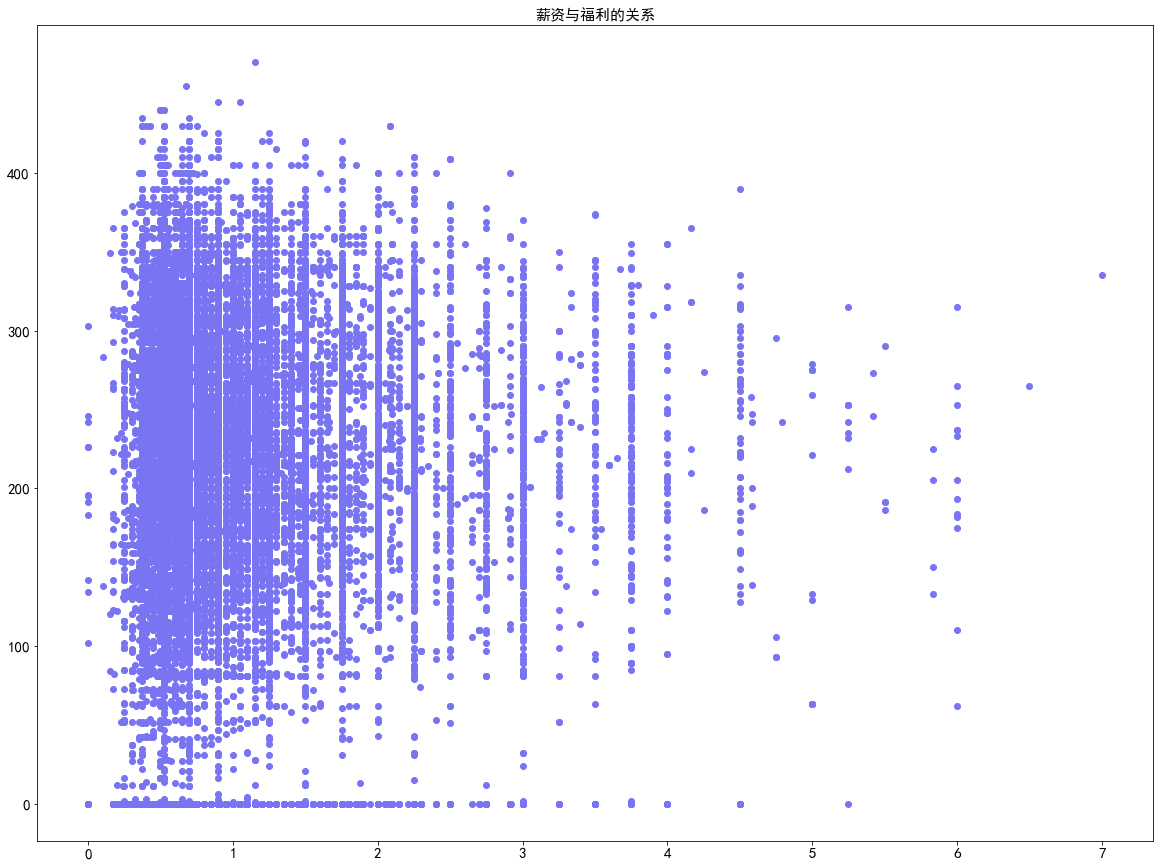

In [9]:
df.drop(df[(df.最高工资+df.最低工资)/2>7].index,inplace=True)
plt.figure(figsize=(20,15))
plt.title('薪资与福利的关系',fontproperties="SimHei",fontsize=15)
plt.scatter((df.最高工资+df.最低工资)/2,y=df.福利值,color='#7874f2')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()